<a href="https://colab.research.google.com/github/Sniperpilot16/DSPS_MRichardson/blob/master/HW6/DSPS_HW6_figurelabels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the Data

In [4]:
from google.colab import drive 
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as pl
import pandas as pd 
import os
import sklearn as skl
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
pwd

'/content'

In [7]:
ls

drive/  sample_data/


In [8]:
cd drive/

/content/drive


In [9]:
ls

'My Drive'/


In [10]:
cd 'My Drive'

/content/drive/My Drive


In [11]:
ls

'2013 NYLT Michael Evaluation.pdf'         'Lyric ideas.gdoc'
 Application.gdoc                          'Merit Badges.gdoc'
'A video Goes with this one.mp3'           'MR. K college essay questions.gdoc'
'Brandan And Josh Combine.m4a'             'My Life story (Thus far).gdoc'
'Brother Leader Educator Bylaws.gdoc'      'New Folder'/
'Choir leadership essay.gdoc'              'Notes from DSPS.gdoc'
'Colab Notebooks'/                         'Physics Buoyancy graph.gsheet'
 College/                                   Poetry/
'College Essay ideas.gdoc'                 'Post Moment Lyrics.gdoc'
'Cool Audition Material.gdoc'              'Renaissance Physics.gdoc'
'Demetrius first person .gdoc'             'Senior Assassins'/
 dsps/                                     'Songs We Need to Cover.gdoc'
'DSPS Quizzes.gdoc'                        'Storm story.gdoc'
'Eagle scout'/                              test_dir/
 editedVideo_6-23-2019_95246_PM_Trim2.mp4  'The Experience Pt Brendan.m4a'
 edi

In [12]:
cd dsps

/content/drive/My Drive/dsps


In [13]:
ls

data/          jla_likelihood_v6.gz    pluto_18v2_1.csv   PlutoReadme18v2.1.pdf
fig1datag.txt  nyc_pluto_19v1_csv.zip  PLUTODD18v2.1.pdf


In [14]:
cd data

/content/drive/My Drive/dsps/data


In [15]:
!wget 'http://supernovae.in2p3.fr/sdss_snls_jla/jla_likelihood_v6.tgz' -nc

File ‘jla_likelihood_v6.tgz’ already there; not retrieving.



In [16]:
ls

jla_likelihood_v6/  jla_likelihood_v6.tgz


In [0]:
!tar -xf jla_likelihood_v6.tgz

In [18]:
ls jl*/data

jla.dataset            JLA.paramnames         jla_v0_covmatrix.dat
jla_lcparams.txt       jla_simple.dataset     jla_vab_covmatrix.dat
jla_mub_covmatrix.dat  jla_simple.dataset~    jla_va_covmatrix.dat
jla_mub.txt            jla_v0a_covmatrix.dat  jla_vb_covmatrix.dat
jla_mub.txt~           jla_v0b_covmatrix.dat


In [19]:
!head jl*/data/jla_lcparams.txt
!pwd

#name zcmb zhel dz mb dmb x1 dx1 color dcolor 3rdvar d3rdvar tmax dtmax cov_m_s cov_m_c cov_s_c set ra dec biascor
03D1au 0.503084 0.504300 0 23.001698 0.088031 1.273191 0.150058 -0.012353 0.030011 9.517000 0.110500 52909.745220 0.214332 0.000790 0.000440 -0.000030 1 36.043210 -4.037469 0.001697
03D1aw 0.580724 0.582000 0 23.573937 0.090132 0.974346 0.273823 -0.025076 0.036691 9.169000 0.088000 52902.898002 0.352732 0.002823 0.000415 0.001574 1 36.061634 -4.517158 0.000843
03D1ax 0.494795 0.496000 0 22.960139 0.088110 -0.728837 0.102069 -0.099683 0.030305 11.580000 0.112500 52915.923670 0.111634 0.000542 0.000475 -0.000024 1 36.097287 -4.720774 0.001692
03D1bp 0.345928 0.347000 0 22.398137 0.087263 -1.155110 0.112834 -0.040581 0.026679 10.821000 0.123500 52920.249015 0.102828 0.001114 0.000616 0.000295 1 36.657235 -4.838779 -0.000270
03D1co 0.677662 0.679000 0 24.078115 0.098356 0.618820 0.404295 -0.039380 0.067403 8.647000 0.284000 52954.458342 0.454715 0.011857 0.000780 0.005898 1 36

In [0]:
jla = pd.read_csv("/content/drive/My Drive/dsps/data/jla_likelihood_v6/data/jla_lcparams.txt", sep=" ")

In [21]:
jla.head()

,#name,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,tmax,dtmax,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor
0,03D1au,0.503084,0.5043,0,23.001698,0.088031,1.273191,0.150058,-0.012353,0.030011,9.517,0.1105,52909.745220,0.214332,0.000790,0.000440,-0.000030,1,36.043210,-4.037469,0.001697
1,03D1aw,0.580724,0.5820,0,23.573937,0.090132,0.974346,0.273823,-0.025076,0.036691,9.169,0.0880,52902.898002,0.352732,0.002823,0.000415,0.001574,1,36.061634,-4.517158,0.000843
2,03D1ax,0.494795,0.4960,0,22.960139,0.088110,-0.728837,0.102069,-0.099683,0.030305,11.580,0.1125,52915.923670,0.111634,0.000542,0.000475,-0.000024,1,36.097287,-4.720774,0.001692
3,03D1bp,0.345928,0.3470,0,22.398137,0.087263,-1.155110,0.112834,-0.040581,0.026679,10.821,0.1235,52920.249015,0.102828,0.001114,0.000616,0.000295,1,36.657235,-4.838779,-0.000270
4,03D1co,0.677662,0.6790,0,24.078115,0.098356,0.618820,0.404295,-0.039380,0.067403,8.647,0.2840,52954.458342,0.454715,0.011857,0.000780,0.005898,1,36.567748,-4.935050,-0.002855


In [22]:
jla.describe()

,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,tmax,dtmax,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor
count,740.000000,740.000000,740.0,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,0.323804,0.324449,0.0,20.904956,0.115913,0.036599,0.311099,-0.023862,0.038897,9.795341,0.827140,53527.309187,0.382252,0.006210,0.000645,0.002665,1.860811,93.551713,5.726200,-0.004195
std,0.276869,0.276748,0.0,2.655143,0.018761,0.988559,0.211398,0.084112,0.015706,1.395068,3.369119,1023.254711,0.299172,0.010127,0.000947,0.005317,0.715821,119.504602,22.728815,0.006796
min,0.010060,0.009370,0.0,14.148421,0.085341,-2.862959,0.017738,-0.250149,0.011882,5.000000,0.004500,48076.401017,0.021321,-0.044995,-0.004558,-0.011397,1.000000,-55.207462,-66.485085,-0.036389
25%,0.124240,0.124418,0.0,19.735791,0.101604,-0.650131,0.148408,-0.084578,0.026015,9.316750,0.106875,53360.155972,0.164968,0.000646,0.000440,0.000061,1.000000,4.812357,-1.037904,-0.008439
50%,0.229045,0.230515,0.0,21.098947,0.114480,0.165391,0.267931,-0.030434,0.034759,10.193500,0.182750,53685.973783,0.307975,0.003097,0.000630,0.000919,2.000000,36.667567,0.237261,-0.001083
75%,0.498216,0.499000,0.0,23.043200,0.124173,0.775606,0.420354,0.030961,0.049647,10.710250,0.290500,54041.338277,0.509950,0.008213,0.000971,0.003591,2.000000,190.881058,2.146795,-0.000380
max,1.299106,1.300000,0.0,26.046776,0.174566,2.337170,1.641345,0.259538,0.106505,11.817000,54.194000,54555.109466,2.336975,0.069409,0.008604,0.053578,4.000000,359.635090,79.031740,0.002649


In [23]:
jla.columns

Index(['#name', 'zcmb', 'zhel', 'dz', 'mb', 'dmb', 'x1', 'dx1', 'color',
       'dcolor', '3rdvar', 'd3rdvar', 'tmax', 'dtmax', 'cov_m_s', 'cov_m_c',
       'cov_s_c', 'set', 'ra', 'dec', 'biascor'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


Text(0.5, 0.98, 'Scatter Matrix of Supernovae Data')

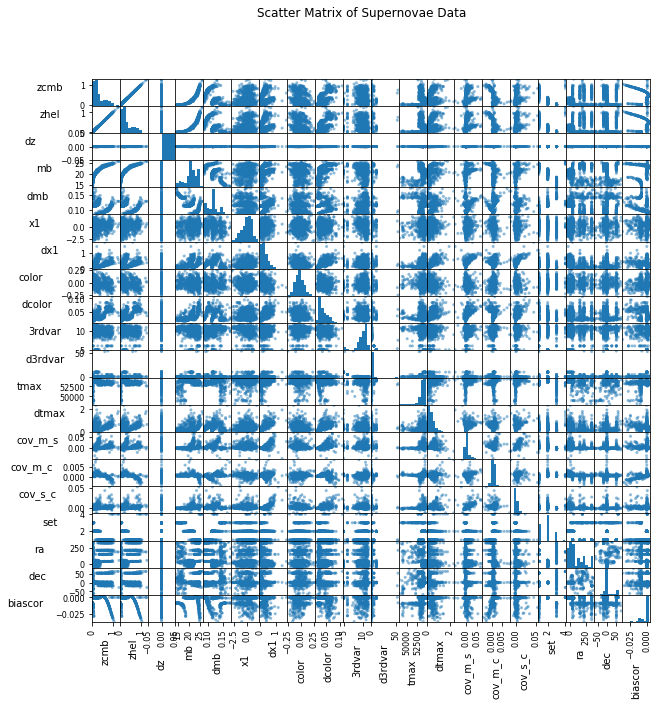

In [24]:
ax = pd.plotting.scatter_matrix(jla, figsize = (10,10))
n = len(jla.columns)-1
for x in range(n):
  for y in range(n):
    ax1 = ax[x,y]
    ax1.xaxis.label.set_rotation(90)
    ax1.yaxis.label.set_rotation(0)
    ax1.yaxis.labelpad = 30
pl.suptitle('Scatter Matrix of Supernovae Data')


**Figure 1:** A Scatter Matrix of all parameters in the data of the file jla_lcparams.txt

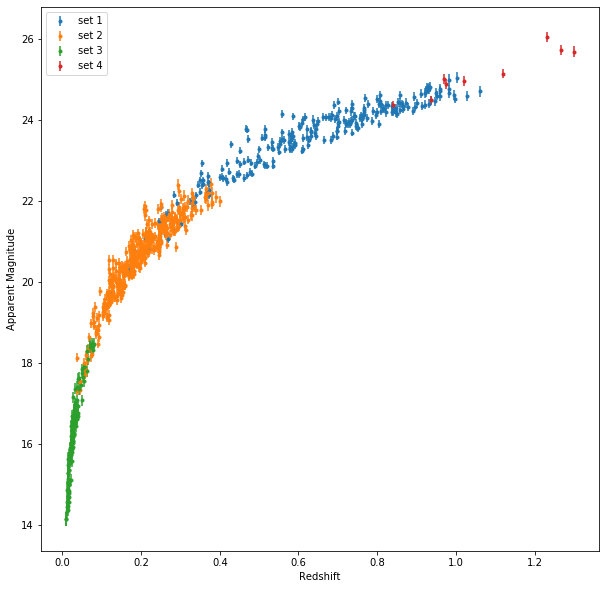

In [25]:
pl.figure(figsize = (10,10))
for i in range(1,5):
  pl.errorbar(jla.zcmb[jla.set == i], jla.mb[jla.set == i], yerr = jla.dmb[jla.set ==i], fmt = '.')
pl.xlabel("Redshift")
pl.ylabel("Apparent Magnitude")
pl.legend(['set 1','set 2','set 3','set 4'])

**Figure 2:** A scatter plot of the ZCMB data vs the MB data. As seen on each point, there are error bars spanning parallel to the Y axis. 

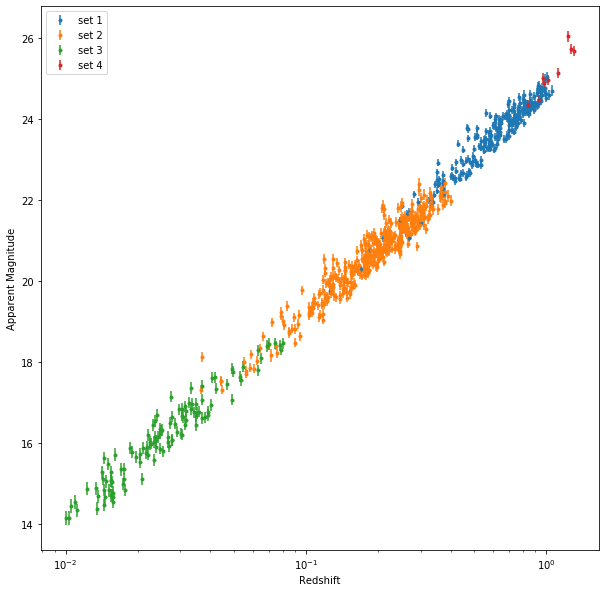

In [26]:
pl.figure(figsize = (10,10))
for i in range(1,5):
  pl.errorbar(jla.zcmb[jla.set == i], jla.mb[jla.set ==i], yerr = jla.dmb[jla.set == i], fmt = '.')
pl.xscale("log")
pl.xlabel("Redshift")
pl.ylabel("Apparent Magnitude")
pl.legend(['set 1','set 2','set 3','set 4'])

**Figure 3:** A scatter plot of the ZCMB data vs the log10 of the MB data. As seen on each point, there are error bars spanning parallel to the Y axis. Due to the log10 being appled to the y values, the graph now appears linear. 

# Fit a Line to the data with scipy

In [0]:
def logfit(x, a, b):
    '''Quadratic equation
    Input:
    x: array-like, the exogenous variable
    a: parameters of the quadratic term
    b: parameter of the linear term
    c: intercept
    
    '''
    return a * np.log10(x) + b

In [0]:
lopt, lcov = sp.optimize.curve_fit(logfit, jla.zcmb, jla.mb, p0 = [6,14])

In [29]:
lopt

array([ 5.37205483, 24.65623053])

In [30]:
lcov

array([[0.00049493, 0.00034561],
       [0.00034561, 0.00036056]])

In [31]:
print("slope: {:.1f} +/- {:.3f} \nintercept: {:.1f} +/- {:.3f} \nparameters covariance: {:.5f}".format(lopt[0],lcov[0][0]**0.5,lopt[1],lcov[1][1]**0.5,lcov[0][1]))


slope: 5.4 +/- 0.022 
intercept: 24.7 +/- 0.019 
parameters covariance: 0.00035


In [0]:
sort = np.argsort(jla.zcmb)

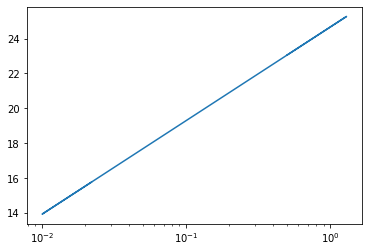

In [33]:
pl.plot(jla.zcmb, logfit(jla.zcmb, lopt[0], lopt[1]), "-")
pl.xscale('log')

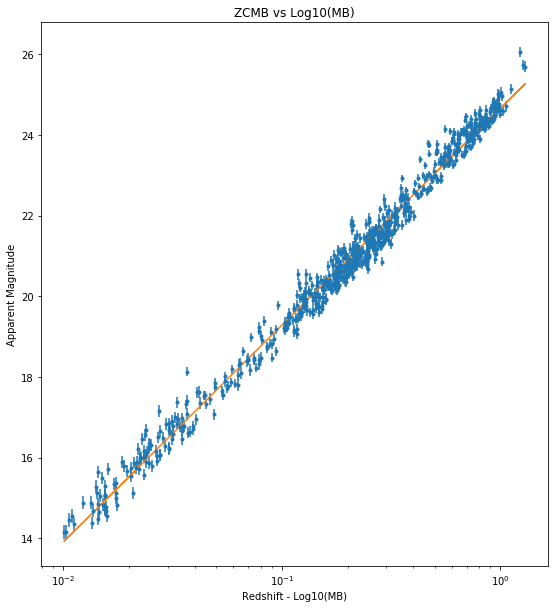

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.


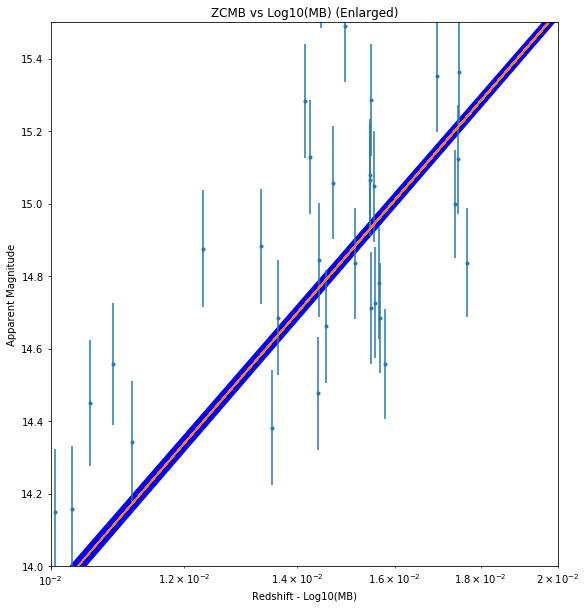

In [34]:
pl.figure(figsize = (20,10))
pl.subplot(121)
pl.errorbar(jla.zcmb, jla.mb, yerr = jla.dmb, fmt = ".")
pl.plot(jla.zcmb, logfit(jla.zcmb, lopt[0], lopt[1]), "-")
pl.xlabel('Redshift - Log10(MB)')
pl.ylabel('Apparent Magnitude')
pl.title('ZCMB vs Log10(MB)')
pl.xscale('log')

pl.show()


pl.figure(figsize=(20,10))
pl.subplot(122)
pl.errorbar(jla.zcmb, jla.mb, yerr = jla.dmb, fmt = '.')
pl.plot(jla.zcmb, logfit(jla.zcmb, lopt[0], lopt[1]), "-")
pl.fill_between(jla.zcmb[sort], 
               logfit(jla.zcmb[sort], lopt[0] + lcov[0][0]**0.5, lopt[1] + lcov[1][1]**0.5), 
               logfit(jla.zcmb[sort], lopt[0] - lcov[0][0]**0.5, lopt[1] - lcov[1][1]**0.5), color='B1')

pl.xlabel('Redshift - Log10(MB)')
pl.ylabel('Apparent Magnitude')
pl.title('ZCMB vs Log10(MB) (Enlarged)')
pl.xscale('log')
pl.xscale('log')
pl.ylim((14, 15.5))
pl.xlim((0.01,0.02))
pl.show()

**Figure 4:** (Scatter Plot) A Scatter plot of the ZCMB data vs the Log10 of the MB data. As seen on each point, there are error bars spanning parallel to the Y axis that are found using the dmb data. 

**Figure 5:** (Enlarged Scatter Plot) An enlarged portion of Figure 4 to show the minor discrepancies between the two fits of data. Since the shaded blue region is small, the amount of error in this is minimal. 

In [0]:
lerropt, lerrcov = sp.optimize.curve_fit(logfit, jla.zcmb, jla.mb, p0=[6,14], sigma = jla.dmb)

In [36]:
lerropt

array([ 5.42599016, 24.6961156 ])

In [37]:
lerrcov

array([[0.000604  , 0.00035954],
       [0.00035954, 0.00032853]])

In [38]:
print(lerropt[0]-lerrcov[0][0], lerropt[0]+lerrcov[0][0])
print(lopt[0]-lcov[0][0], lopt[0]+lcov[0][0])

5.4253861627552995 5.426594161376369
5.371559904729385 5.372549759787334


(0.01, 0.02)

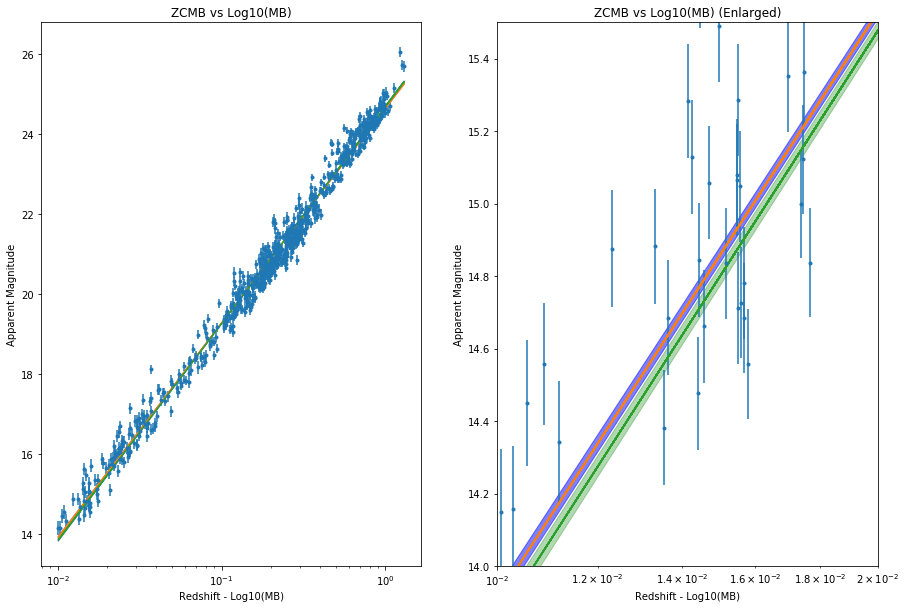

In [47]:
pl.figure(figsize = (15,10))
pl.subplot(121)
pl.errorbar(jla.zcmb, jla.mb, yerr = jla.dmb, fmt = ".")


pl.plot(jla.zcmb, logfit(jla.zcmb, lopt[0], lopt[1]), "-")
pl.fill_between(jla.zcmb[sort], 
               logfit(jla.zcmb[sort], lopt[0] + lcov[0][0]**0.5, lopt[1] + lcov[1][1]**0.5), 
               logfit(jla.zcmb[sort], lopt[0] - lcov[0][0]**0.5, lopt[1] - lcov[1][1]**0.5), color='B1', alpha = 0.5)
                

pl.plot(jla.zcmb, logfit(jla.zcmb, lerropt[0], lerropt[1]), "-")
pl.fill_between(jla.zcmb[sort], 
               logfit(jla.zcmb[sort], lerropt[0] + lerrcov[0][0]**0.5, lerropt[1] + lerrcov[1][1]**0.5), 
               logfit(jla.zcmb[sort], lerropt[0] - lerrcov[0][0]**0.5, lerropt[1] - lerrcov[1][1]**0.5), color='B1',  alpha = 0.5)
                
pl.xlabel('Redshift - Log10(MB)')
pl.ylabel('Apparent Magnitude')
pl.title('ZCMB vs Log10(MB)')
pl.xscale('log')


pl.subplot(122)
pl.errorbar(jla.zcmb, jla.mb, yerr = jla.dmb, fmt = ".")


pl.plot(jla.zcmb, logfit(jla.zcmb, lopt[0], lopt[1]), "-")
pl.fill_between(jla.zcmb[sort], 
               logfit(jla.zcmb[sort], lopt[0] + lcov[0][0]**0.5, lopt[1] + lcov[1][1]**0.5), 
               logfit(jla.zcmb[sort], lopt[0] - lcov[0][0]**0.5, lopt[1] - lcov[1][1]**0.5), color='B1', alpha = 0.5)
                

pl.plot(jla.zcmb, logfit(jla.zcmb, lerropt[0], lerropt[1]), "-")
pl.fill_between(jla.zcmb[sort], 
               logfit(jla.zcmb[sort], lerropt[0] + lerrcov[0][0]**0.5, lerropt[1] + lerrcov[1][1]**0.5), 
               logfit(jla.zcmb[sort], lerropt[0] - lerrcov[0][0]**0.5, lerropt[1] - lerrcov[1][1]**0.5), color='green',  alpha = 0.3)

pl.xlabel('Redshift - Log10(MB)')
pl.ylabel('Apparent Magnitude')
pl.title('ZCMB vs Log10(MB) (Enlarged)')
pl.xscale('log')
pl.ylim((14,15.5))
pl.xlim((0.01, 0.02))

**Figure 6:** (Scatter Plot) Scatter plot of ZCMB data vs the Log 10 of the MB data. As seen on each point, there are error bars spanning parallel to the Y axis that are found using the dmb data. Fitting the data are two line fits. 

**Figure 7:** (Enlarged Scatter Plot) A section of Figure 6 that is enlarged to show the discrepancies between the two line fits. Additionally there are small shaded regions to each of the fits meaning that the data has small amounts of error. 

Text(0.5, 1.0, 'ZCMB vs Log10(MB)')

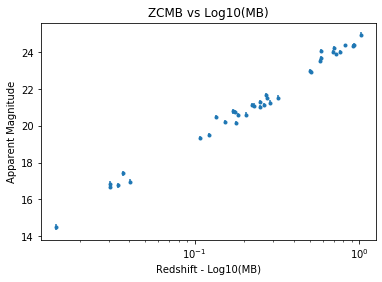

In [48]:
slice_dx = jla.zcmb[0::20]
slice_dy = jla.mb[0::20]
slice_de = jla.dmb[0::20]

pl.errorbar(slice_dx, slice_dy,yerr = slice_de, fmt = '.')
pl.xscale('log')
pl.xlabel('Redshift - Log10(MB)')
pl.ylabel('Apparent Magnitude')
pl.title('ZCMB vs Log10(MB)')

**Figure 8:** A Scatter plot of the ZCMB data vs the Log10 of the MB data however only 1 out of every 20 data points are used. 

In [41]:
jopt, jcov = sp.optimize.curve_fit(logfit, slice_dx, slice_dy)
print(jopt, '\n\n', jcov)

[ 5.42105772 24.67804949] 

 [[0.01000833 0.00640421]
 [0.00640421 0.00637401]]


Text(0.5, 1.0, 'ZCMB vs Log10(MB) - Sliced data')

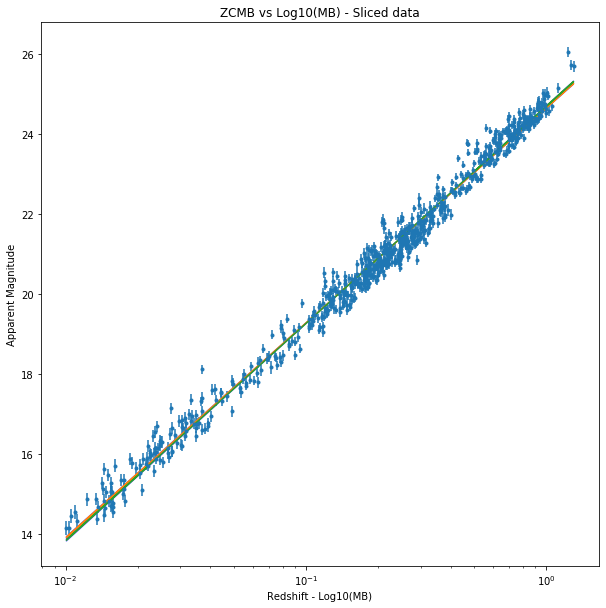

In [49]:
pl.figure(figsize = (10,10))
pl.errorbar(jla.zcmb, jla.mb, yerr = jla.dmb, fmt=".")

pl.plot(jla.zcmb, logfit(jla.zcmb, lopt[0], lopt[1]), "-")
pl.fill_between(jla.zcmb[sort],
               logfit(jla.zcmb[sort], lopt[0] + lcov[0][0]**0.5, lopt[1] + lcov[1][1]**0.5), 
               logfit(jla.zcmb[sort], lopt[0] - lcov[0][0]**0.5, lopt[1] - lcov[1][1]**0.5), color='B1', alpha = 0.5)
                

pl.plot(jla.zcmb, logfit(jla.zcmb, lerropt[0], lerropt[1]), "-")
pl.fill_between(jla.zcmb[sort], 
               logfit(jla.zcmb[sort], lerropt[0] + lerrcov[0][0]**0.5, lerropt[1] + lerrcov[1][1]**0.5), 
               logfit(jla.zcmb[sort], lerropt[0] - lerrcov[0][0]**0.5, lerropt[1] - lerrcov[1][1]**0.5), color='B1',  alpha = 0.5)
                
pl.xscale('log')
pl.xlabel('Redshift - Log10(MB)')
pl.ylabel('Apparent Magnitude')
pl.title('ZCMB vs Log10(MB) - Sliced data')


**Figure 9:** A Scatter Plot of the ZCMB data vs the Log 10 of the MB data. As seen on each point, there are error bars spanning parallel to the Y axis that are found using the dmb data. Additionally, there is a line fitting the data.  

# Fit a Quadratic Equation

In [0]:
def quad(x, a, b, c):
  '''Quadratic equation
    Input:
    x: array-like, the exogenous variable
    a: parameters of the quadratic term
    b: parameter of the linear term
    c: intercept
    
  '''
  return a * np.log10(x)**2 + b * np.log10(x) + c

In [44]:
jopt1, jcov1 = sp.optimize.curve_fit(quad, jla.zcmb, jla.mb, sigma = jla.dmb)
print(jopt1)
print(jcov1)

[ 0.34823129  5.98460069 24.83923108]
[[0.00172315 0.00276417 0.00070818]
 [0.00276417 0.00498621 0.00146466]
 [0.00070818 0.00146466 0.00059134]]


In [50]:
pl.figure(figsize=(10,10))
pl.errorbar(jla.zcmb, jla.mb, yerr = jla.dmb, fmt = ".")
pl.plot(jla.zcmb, logquad(jla.zcmb, jopt1[0], jopt1[1], jopt1[2]), "-", c='maroon')
pl.plot(jla.zcmb, logline(jla.zcmb, lerropt[0], lerropt[1]), "-", c='green')
pl.plot(jla.zcmb, logfit(jla.zcmb, jopt[0], jopt[1], "r")
pl.fill_between(jla.zcmb[sort],
                 quad(jla.zcmb[sort], jopt1[0] + jcov1[0][0]**0.5, jopt1[1] + jcov1[1][1]**0.5, jopt1[2] + jcov1[2][2]**0.5),
                 quad(jla.zcmb[sort], jopt1[0] - jcov1[0][0]**0.5, jopt1[1] - jcov1[1][1]**0.5, jopt1[2] - jcov1[2][2]**0.5),
                color='maroon',alpha=0.5)
pl.fill_between(jla.zcmb[sort], 
               logfit(jla.zcmb[sort], jopt[0] + jcov[0][0]**0.5, jopt[1] + jcov[1][1]**0.5), 
               logfit(jla.zcmb[sort], jopt[0] - jcov[0][0]**0.5, jopt[1] - jcov[1][1]**0.5),
               color = 'r', alpha = 0.3)
pl.xscale('log')

SyntaxError: ignored

# Now fit the data with sklean

In [0]:
regr = skl.linear_model.LinearRegression()

In [52]:
regr.fit(np.atleast_2d(np.log10(jla.zcmb)).T, jla.mb)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

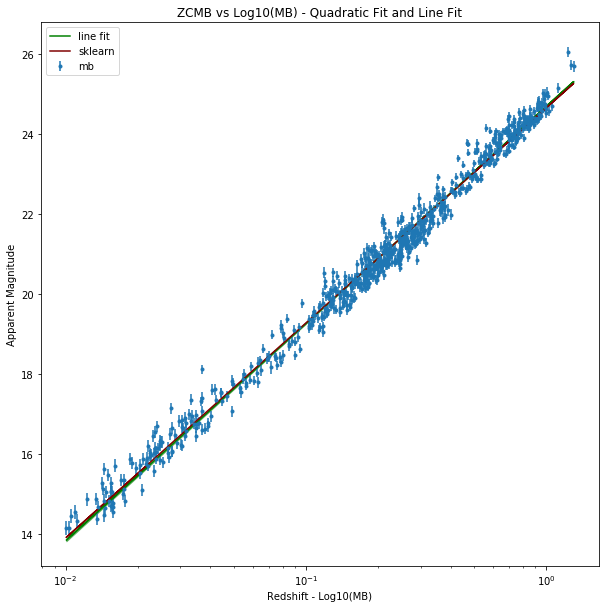

In [60]:
pl.figure(figsize = (10,10))
pl.errorbar(jla.zcmb, jla.mb, yerr = jla.dmb, fmt = '.');
pl.plot(jla.zcmb, logfit(jla.zcmb, lerropt[0], lerropt[1]), '-', c='green')
pl.plot(jla.zcmb, regr.predict(np.atleast_2d(np.log10(jla.zcmb)).T), '-', c = 'maroon')
pl.legend(['line fit', 'sklearn', 'mb'])

pl.fill_between(jla.zcmb[sort],
                 logfit(jla.zcmb[sort], lerropt[0] + lerrcov[0][0]**0.5, lerropt[1] + lerrcov[1][1]**0.5),
                 logfit(jla.zcmb[sort], lerropt[0] - lerrcov[0][0]**0.5, lerropt[1] - lerrcov[1][1]**0.5),
                 color='green',alpha=0.5)

pl.xscale('log')
pl.xlabel('Redshift - Log10(MB)')
pl.ylabel('Apparent Magnitude')
pl.title('ZCMB vs Log10(MB) - Quadratic Fit and Line Fit');

**Figure 10:** A scatter plot of the ZCMB data vs the log 10 of the MB data. As seen on each point, there are error bars spanning parallel to the Y axis that are found using the dmb data. In this there are two fits, one that is a quadratic(red) and one that is a line fit (green). As seen, both the line fit and quadratic fit, fit the data well. 

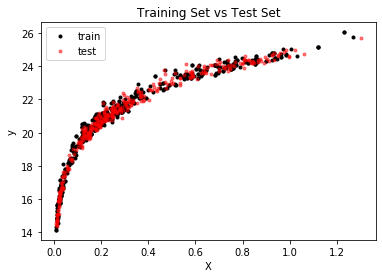

In [61]:
Nall = len(jla)
Ntrain = int(Nall * 0.75)
train = np.random.randint(0, high=Nall, size=Ntrain)
test = np.setdiff1d(np.arange(Nall), train)
X_train, y_train = jla.zcmb[train], jla.mb[train]
X_test, y_test = jla.zcmb[test], jla.mb[test]
pl.plot(X_train, y_train, 'k.', label="train")
pl.plot(X_test, y_test, 'r.', alpha=0.5, label="test")
pl.xlabel("X")
pl.ylabel("y")
pl.title('Training Set vs Test Set')
pl.legend()

**Figure 11:** Scatter Plot of the training data vs the test data. As seen by its shape, this data follows a curve of a log curve. 

In [0]:
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(np.log10(jla.zcmb), jla.mb, test_size = 0.25, train_size = 0.75)

In [0]:
regr1 = skl.linear_model.LinearRegression()

In [57]:
regr1.fit(np.atleast_2d(X_train).T, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'ZCMB vs Log10(MB) - Fit with SKLean')

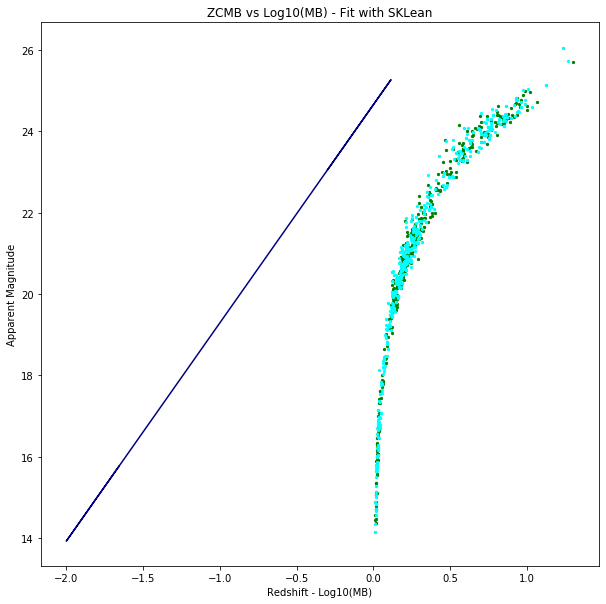

In [62]:
pl.figure(figsize = (10,10))
pl.scatter(X_test, y_test, s = 5, color = 'green', label = "test set")
pl.scatter(X_train, y_train, s = 5, color = "cyan", label = 'train set')

pl.plot(np.log10(jla.zcmb), regr1.predict(np.atleast_2d(np.log10(jla.zcmb)).T), '-', c='navy')

pl.xlabel('Redshift - Log10(MB)')
pl.ylabel('Apparent Magnitude')
pl.title('ZCMB vs Log10(MB) - Fit with SKLean')



**Figure 12:** A scatter plot of the training set and the test set using sklean. Additionally there is a line fit to the data. 

In [59]:
print("Score for the training set: ", np.round(regr1.score(np.atleast_2d(X_train).T, y_train), 4))
print("Score for the test set: ", np.round(regr1.score(np.atleast_2d(X_test).T, y_test), 4))

Score for the training set:  0.9866
Score for the test set:  0.9899
